### Principal Component Analysis

In [1]:
from __future__ import print_function

import numpy as np
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

C:\Users\sudip\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Prepare DataSet (Olivetti face)

In [2]:
faces_data = fetch_olivetti_faces()
n_samples, height, width = faces_data.images.shape
X = faces_data.data
n_features = X.shape[1]
y = faces_data.target
n_classes = int(max(y)+1)

print("Number of Samples:", n_samples, "\nImage Size:", height, width)
print("\nNumber of input features: {}\nNumber of output classes: {}\n".format(n_features,n_classes))

Number of Samples: 400 
Image Size: 64 64

Number of input features: 4096
Number of output classes: 40



### Shuffle the data randomly, and split training set (75%) and test set (25%)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

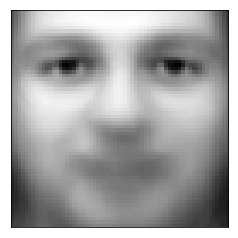

In [4]:
mean_image = np.mean(X_train,axis=0)
plt.figure
plt.imshow(mean_image.reshape((64,64)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

#### Make a function for visualization of the Images as an album

In [5]:
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#### Visualize some Images from the Training Set

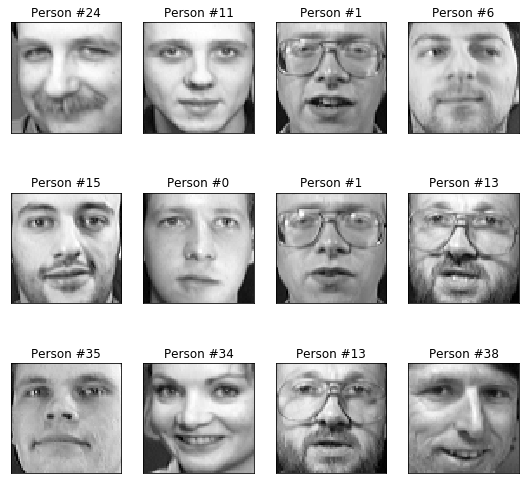

In [6]:
chosen_images = X_train[:12]
chosen_labels = y_train[:12]
titles = ['Person #'+str(i) for i in chosen_labels]

plot_gallery(chosen_images, height, width, titles)

### Eigen Vector:
#### Considering eigen vector as an eigen faces, we can represent any image as a linear combination of eigen faces..

C:\Users\sudip\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


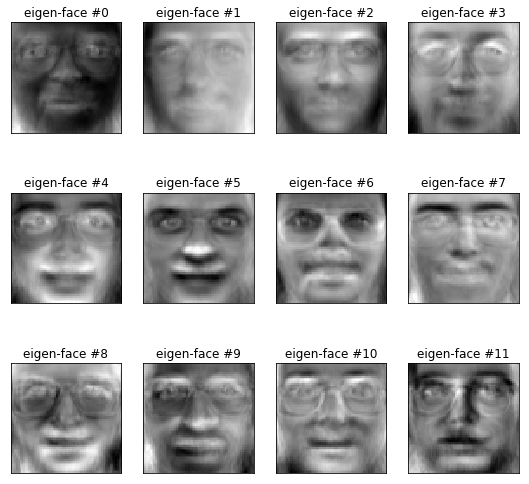

In [7]:
#Reduce the dimensionality of the feature space
n_components = 150

#Finding the top n_components principal components in the data
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

#Find the eigen-vectors of the feature space
eigenfaces = pca.components_.reshape((n_components, height, width))

titles = ['eigen-face #'+str(i) for i in range(12)]
plot_gallery(eigenfaces, height, width, titles)

### Transform the data to the vector space spanned by the eigen faces

In [8]:
#Projecting the data onto the eigenspace
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (300, 150)


### Use a KNN-classifier in this transformed space to identify the faces

In [9]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train_pca, y_train)

#Detect faces in the test set
y_pred_test = knn_classifier.predict(X_test_pca)
correct_count = 0.0
for i in range(len(y_test)):
    if y_pred_test[i] == y_test[i]:
        correct_count += 1.0
accuracy = correct_count/float(len(y_test))
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test, labels=range(n_classes)))

Accuracy: 0.57
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         4
          1       0.00      0.00      0.00         2
          2       1.00      0.50      0.67         2
          3       1.00      0.25      0.40         4
          4       0.33      1.00      0.50         3
          5       1.00      1.00      1.00         3
          6       0.00      0.00      0.00         1
          7       1.00      0.57      0.73         7
          8       0.40      1.00      0.57         2
          9       0.75      1.00      0.86         3
         10       1.00      0.67      0.80         3
         11       1.00      0.25      0.40         4
         12       1.00      1.00      1.00         2
         13       0.00      0.00      0.00         1
         14       0.33      1.00      0.50         3
         15       1.00      0.50      0.67         2
         17       0.67      0.67      0.67         3
         18       0.40      1.

C:\Users\sudip\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


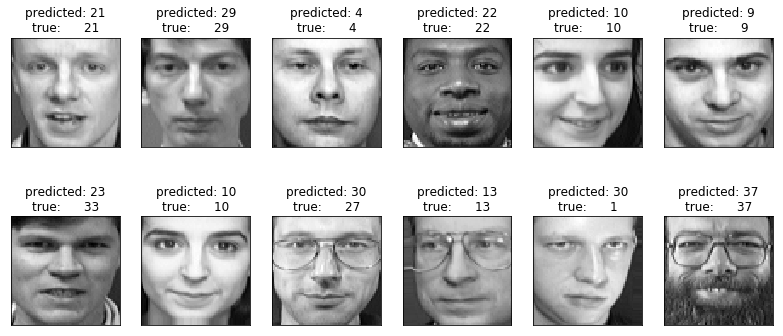

In [10]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
target_names = [str(element) for element in np.arange(40)+1]
prediction_titles = [title(y_pred_test, y_test, target_names, i)
                     for i in range(y_pred_test.shape[0])]
plot_gallery(X_test, height, width, prediction_titles, n_row=2, n_col=6)
plt.show()